# Problem Statement

### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the EastWest Airlines data and identify the number of clusters formed and draw inferences.

## Import libraries

In [1]:
import pandas as pd
import numpy  as np

from matplotlib import pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Reading the excel file

In [2]:
xls = pd.ExcelFile('EastWestAirlines.xlsx')

# Now you can list all sheets in the file
xls.sheet_names

['Description', 'data']

In [3]:
# to read just one sheet to dataframe:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name="data")

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Understanding the Dataset

The dataset appears to be related to a customer satisfaction survey conducted by EastWest Airlines.
Each row represents a survey response from a passenger.

- **ID**: Unique identifier for each passenger.
- **Balance**: The amount of money in the passenger's account.
- **Qual_miles**: The number of qualifying miles the passenger has accumulated.
- **cc1_miles**: The number of miles the passenger has earned on their credit card.
- **cc2_miles**: The number of miles the passenger has earned on their second credit card.
- **cc3_miles**: The number of miles the passenger has earned on their third credit card.
- **Bonus_miles**: The number of bonus miles the passenger has earned.
- **Flight_miles_12mo**: The number of miles the passenger has flown in the past 12 months.
- **Flight_trans_12**: The number of flights the passenger has taken in the past 12 months.
- **Days_since_enroll**: The number of days since the passenger enrolled in the loyalty program.
- **Award**?: Whether the passenger has redeemed any miles for an award.




Independent variables:

- Balance
- Qual_miles
- cc1_miles
- cc2_miles
- cc3_miles
- Bonus_miles
- Flight_miles_12mo
- Flight_trans_12
- Days_since_enroll
- Bonus_trans

Dependent variable:

- Award?


## Checking the shape

In [5]:
df.shape

(3999, 12)

## Checking of Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


## Checking of duplicate values

In [7]:
df[df.duplicated(keep=False)]

# "first": Keep the first occurrence of each duplicate row.
# "last": Keep the last occurrence of each duplicate row.
# False: Keep all duplicate rows.
# keep must be either "first", "last" or False
# Default value of Keep is 'first'

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


There is no duplicate value in our dataset

## Check in the statistic terms to get basic idea

In [8]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [10]:
# Categorical data

df['Award?'].unique()

array([0, 1])

## Checking for Outliers using boxplot

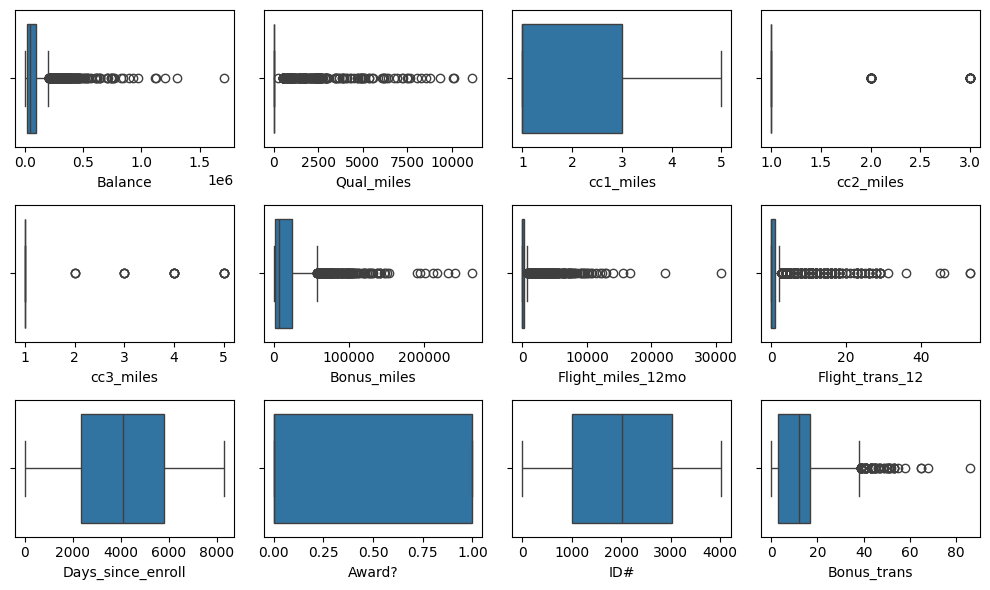

In [11]:
# boxplot for given dataset using sns library subplots

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 6))
# sns.boxplot(data=df, orient="h", ax=axes[0,0]) # Plots all columns at once.
sns.boxplot(x=df['Balance'], ax=axes[0, 0])
sns.boxplot(x=df['Qual_miles'], ax=axes[0, 1])
sns.boxplot(x=df['cc1_miles'], ax=axes[0, 2])
sns.boxplot(x=df['cc2_miles'], ax=axes[0, 3])
sns.boxplot(x=df['cc3_miles'], ax=axes[1, 0])
sns.boxplot(x=df['Bonus_miles'], ax=axes[1, 1])
sns.boxplot(x=df['Flight_miles_12mo'], ax=axes[1, 2])
sns.boxplot(x=df['Flight_trans_12'], ax=axes[1, 3])
sns.boxplot(x=df['Days_since_enroll'], ax=axes[2, 0])
sns.boxplot(x=df['Award?'], ax=axes[2, 1])
sns.boxplot(x=df['ID#'], ax=axes[2, 2])
sns.boxplot(x=df['Bonus_trans'], ax=axes[2, 3])
plt.tight_layout()
plt.show()


## Checking for the Normal Distribution in the data using Distplot

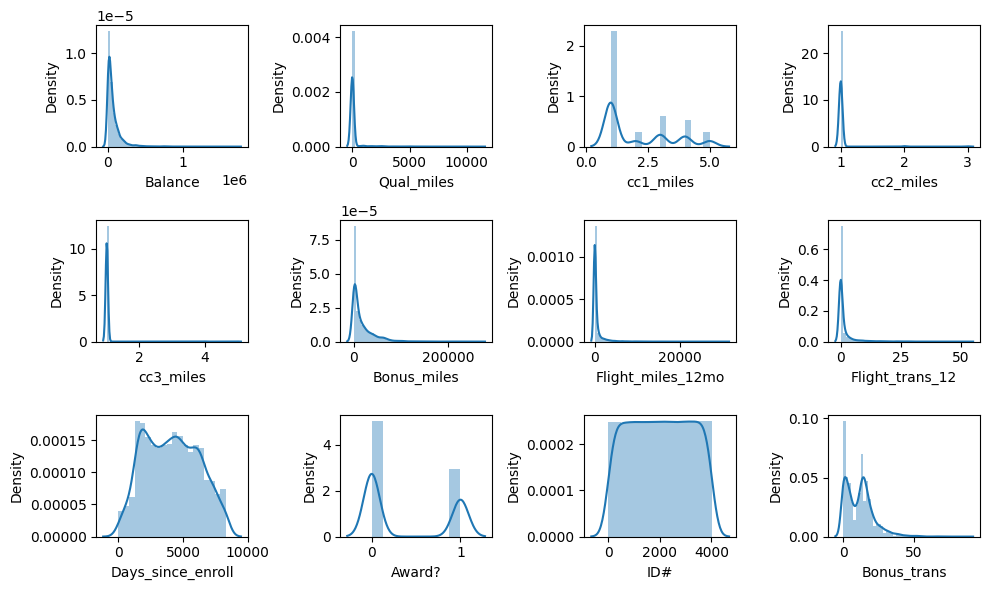

In [12]:
# distplot for given dataset using sns library subplots

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,6))
sns.distplot(df['Balance'], ax=axes[0, 0]) # Distplot shows xlabel, only if written like this
sns.distplot(df['Qual_miles'], ax=axes[0, 1])
sns.distplot(df['cc1_miles'], ax=axes[0, 2])
sns.distplot(df['cc2_miles'], ax=axes[0, 3])
sns.distplot(df['cc3_miles'], ax=axes[1, 0])
sns.distplot(df['Bonus_miles'], ax=axes[1, 1])
sns.distplot(df['Flight_miles_12mo'], ax=axes[1, 2])
sns.distplot(df['Flight_trans_12'], ax=axes[1, 3])
sns.distplot(df['Days_since_enroll'], ax=axes[2, 0])
sns.distplot(df['Award?'], ax=axes[2, 1])
sns.distplot(df['ID#'], ax=axes[2, 2])
sns.distplot(df['Bonus_trans'], ax=axes[2, 3])
plt.tight_layout()
plt.show()


## We will apply Normalization on given data, because Features have different Range

In [13]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return x

In [14]:
df_norm = norm_func(df.iloc[:,1: ])

## Normalized Crime data

In [15]:
df_norm.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


## Hierarchial Clusting using Single Linkage

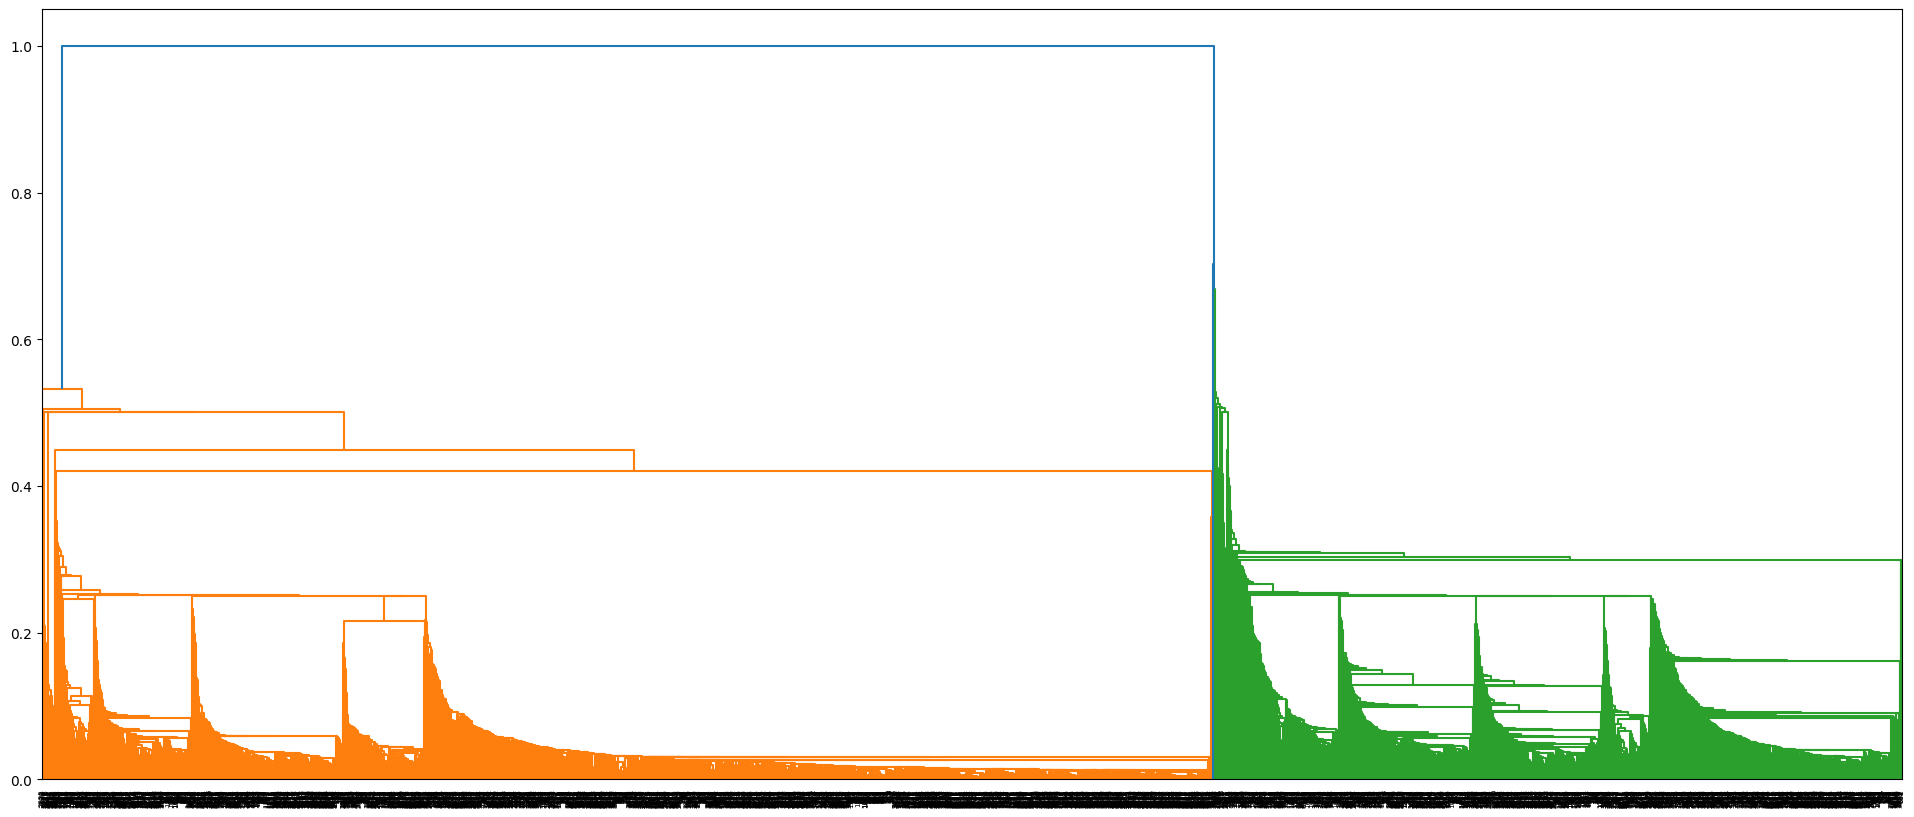

In [178]:
plt.figure(figsize=(24, 10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

# # y-axis = distance btw the clusters

## Hierarchial Clustring with 3 clusters

In [17]:
# Agglomerative clustering is a bottom-up approach to clustering data points.
# It starts with each data point as a separate cluster and then
# iteratively merges the closest clusters until a single cluster is formed.

In [18]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')

In [19]:
y_hc1 = hc.fit_predict(df_norm)
# Clusters = pd.DataFrame(y_hc1, columns=['Clusters']) # data in Clusters column is taken from the `y_hc1`

In [20]:
df['cluster'] = y_hc1

In [21]:
# Find Mean of each column based on Cluster's
df.groupby('cluster').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,
0,1744.335811,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0


In [22]:
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1744.335811,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1.0
1,1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0


In [23]:
# df = df.rename(columns={"ID#": "User_ID"})

## View Data in Each Cluster

In [24]:
for i in range(3):
  print('cluster',i)
  print('The Users are:', ' , '.join(list(df[df['cluster']==i]["ID#"].astype(str).values))) # join function can only be used for Strings
  print('Total Users:', len(list(df[df['cluster']==i]["ID#"].values)))
  print()


cluster 0
The Users are: 5 , 8 , 9 , 10 , 12 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 29 , 30 , 36 , 37 , 39 , 40 , 42 , 43 , 44 , 46 , 48 , 49 , 53 , 54 , 58 , 60 , 66 , 69 , 71 , 81 , 82 , 83 , 88 , 89 , 92 , 93 , 95 , 96 , 97 , 102 , 103 , 104 , 106 , 108 , 109 , 110 , 111 , 112 , 114 , 116 , 117 , 120 , 121 , 122 , 124 , 125 , 126 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 140 , 141 , 148 , 150 , 153 , 154 , 157 , 160 , 161 , 164 , 165 , 166 , 167 , 170 , 171 , 172 , 173 , 175 , 176 , 178 , 179 , 180 , 181 , 182 , 184 , 187 , 190 , 194 , 195 , 196 , 198 , 200 , 202 , 203 , 204 , 205 , 207 , 210 , 211 , 212 , 214 , 217 , 222 , 224 , 225 , 226 , 230 , 231 , 234 , 235 , 237 , 238 , 239 , 241 , 242 , 245 , 248 , 249 , 251 , 252 , 257 , 258 , 261 , 263 , 268 , 269 , 272 , 273 , 274 , 275 , 276 , 279 , 281 , 283 , 285 , 287 , 288 , 289 , 290 , 292 , 294 , 295 , 296 , 300 , 302 , 304 , 306 , 309 , 311 , 315 , 316 , 317 , 318 , 319 , 322 , 323 , 325 , 326 , 327 , 329 ,

In [25]:
# df[df['cluster'] == i]: This part of the code filters the df dataframe based on the cluster column.
#                               It selects only rows where the cluster value is equal to i.

# ['ID#']: This part of the code selects the ID# column from the filtered dataframe.

# .values: This part of the code extracts the actual values from the ID# column, resulting in a list of user ID's.

# ' | '.join(...): This part of the code joins the list of user ID's  into a single string, separating them by the comma (,) character.

## We can clearly see this method is not giving proper result so we will try different method to identify best no. of clusters
* Since, 3rd cluster has only 1 user ID
* around 99% of data is present in 1st & 2nd cluster's only

# Hierarchial Clusting with Average Linkage

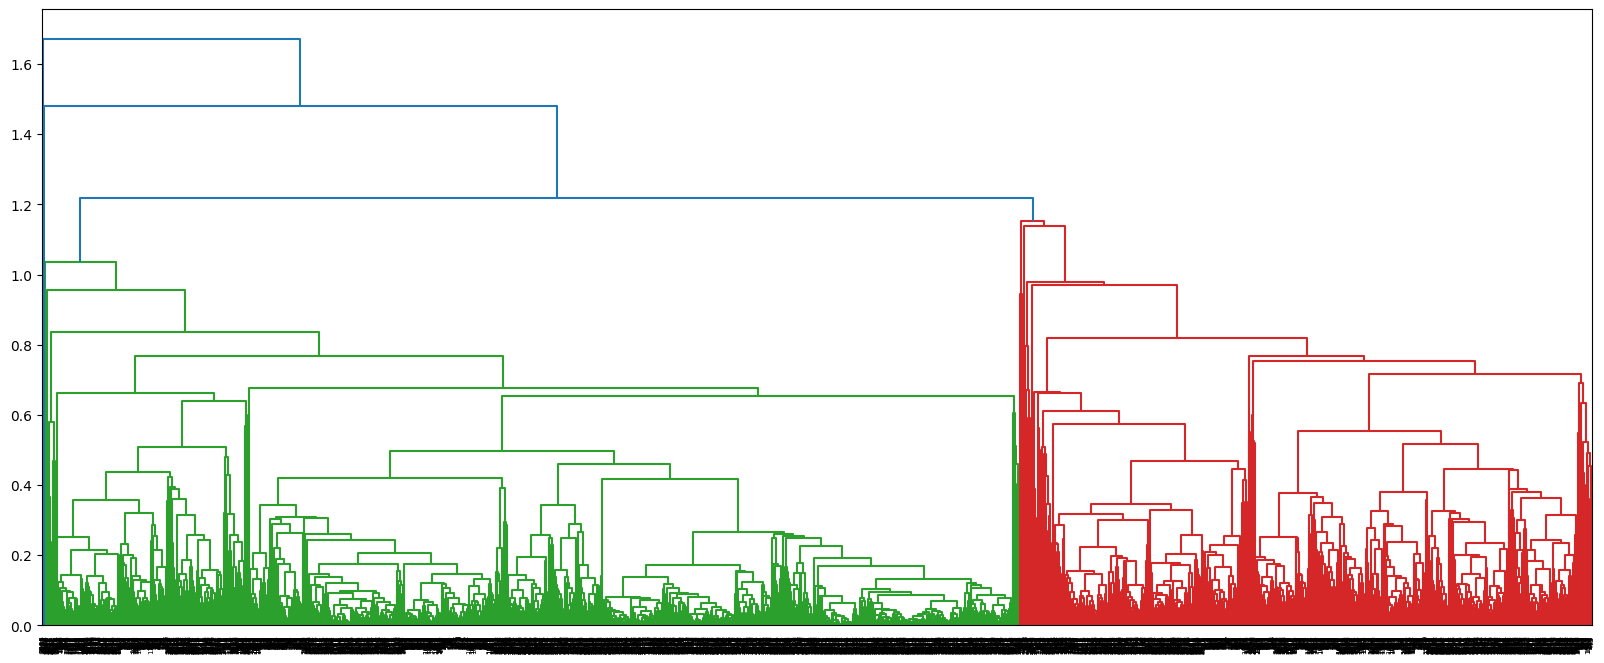

In [26]:
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [28]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')

In [30]:
y_hc2 = hc.fit_predict(df_norm)

## Creating a new cluster column with the average linkage cluster labels

In [31]:
df['cluster']=y_hc2

In [32]:
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2014.139209,7.313442e+04,143.947421,2.059339,1.014522,1.012268,17096.29319,11.539059,439.434151,1.32023,4119.688282,0.369554
1,1,3128.000000,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.25000,69.250000,19960.000000,49.25000,2200.250000,1.000000
2,2,279.000000,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.00000,32.000000,4823.000000,23.00000,7283.000000,1.000000


## Viewing the values in all the 3 clusters

In [33]:
for i in range(3):
  print('cluster',i)
  print('The Users are:', ' , '.join(list(df[df['cluster']==i]["ID#"].astype(str).values))) # join function can only be used for Strings
  print('Total Users:', len(list(df[df['cluster']==i]["ID#"].values)))
  print()


cluster 0
The Users are: 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 63 , 64 , 65 , 66 , 67 , 68 , 69 , 71 , 72 , 73 , 74 , 75 , 76 , 78 , 79 , 80 , 81 , 82 , 83 , 84 , 85 , 86 , 87 , 88 , 89 , 90 , 91 , 92 , 93 , 94 , 95 , 96 , 97 , 98 , 99 , 100 , 101 , 102 , 103 , 104 , 105 , 106 , 107 , 108 , 109 , 110 , 111 , 112 , 113 , 114 , 115 , 116 , 117 , 118 , 119 , 120 , 121 , 122 , 123 , 124 , 125 , 126 , 127 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 142 , 143 , 144 , 145 , 146 , 147 , 148 , 149 , 150 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 177 , 178 , 179 , 180 , 181 , 182 , 1

## Now apply Complete linkage method

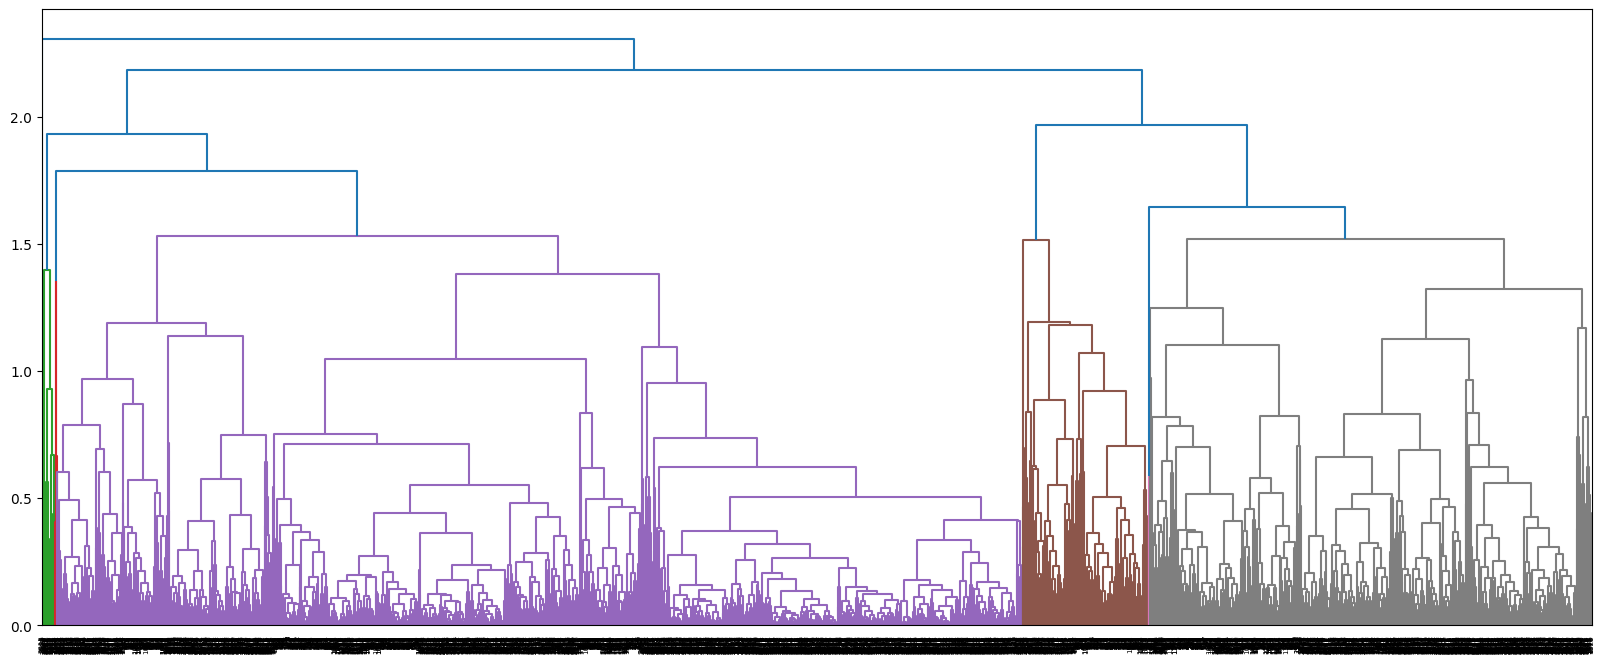

In [35]:
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [36]:
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')

In [37]:
y_hc3 = hc.fit_predict(df_norm)

## Creating new cluster column with complete linkage cluster labels

In [38]:
df['cluster'] = y_hc3

In [39]:
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
1,1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,2,2170.104777,59961.123244,88.551987,1.712967,1.000401,1.006022,10170.362505,9.095143,227.239663,0.653553,3824.722601,0.000000
3,3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,4,2302.967742,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548
5,5,1840.500000,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000


## Viewing the values in all 4 clusters

In [40]:
for i in range(6):
  print('cluster',i)
  print('The Users are:', ' , '.join(list(df[df['cluster']==i]["ID#"].astype(str).values))) # join function can only be used for Strings
  print('Total Users:', len(list(df[df['cluster']==i]["ID#"].values)))
  print()


cluster 0
The Users are: 8 , 9 , 10 , 18 , 19 , 20 , 22 , 29 , 30 , 37 , 39 , 40 , 43 , 44 , 46 , 48 , 49 , 54 , 58 , 60 , 66 , 69 , 71 , 83 , 89 , 92 , 93 , 96 , 102 , 104 , 106 , 110 , 114 , 116 , 117 , 120 , 121 , 122 , 126 , 131 , 133 , 134 , 135 , 136 , 137 , 138 , 141 , 148 , 160 , 165 , 167 , 175 , 176 , 179 , 180 , 181 , 182 , 184 , 187 , 198 , 205 , 211 , 212 , 217 , 222 , 226 , 230 , 234 , 237 , 238 , 239 , 241 , 245 , 251 , 257 , 258 , 261 , 268 , 269 , 274 , 279 , 281 , 287 , 304 , 311 , 318 , 319 , 322 , 323 , 325 , 327 , 329 , 338 , 340 , 346 , 354 , 358 , 365 , 370 , 371 , 375 , 379 , 380 , 382 , 397 , 398 , 413 , 421 , 422 , 423 , 426 , 436 , 437 , 438 , 440 , 447 , 450 , 451 , 452 , 462 , 467 , 468 , 475 , 477 , 481 , 485 , 488 , 490 , 491 , 493 , 494 , 496 , 502 , 503 , 506 , 513 , 517 , 522 , 525 , 530 , 535 , 536 , 541 , 542 , 547 , 550 , 551 , 554 , 555 , 557 , 560 , 562 , 564 , 567 , 568 , 569 , 572 , 577 , 585 , 596 , 600 , 602 , 612 , 613 , 614 , 619 , 620 , 621

## Now we will apply the ward(centroid) linkage method

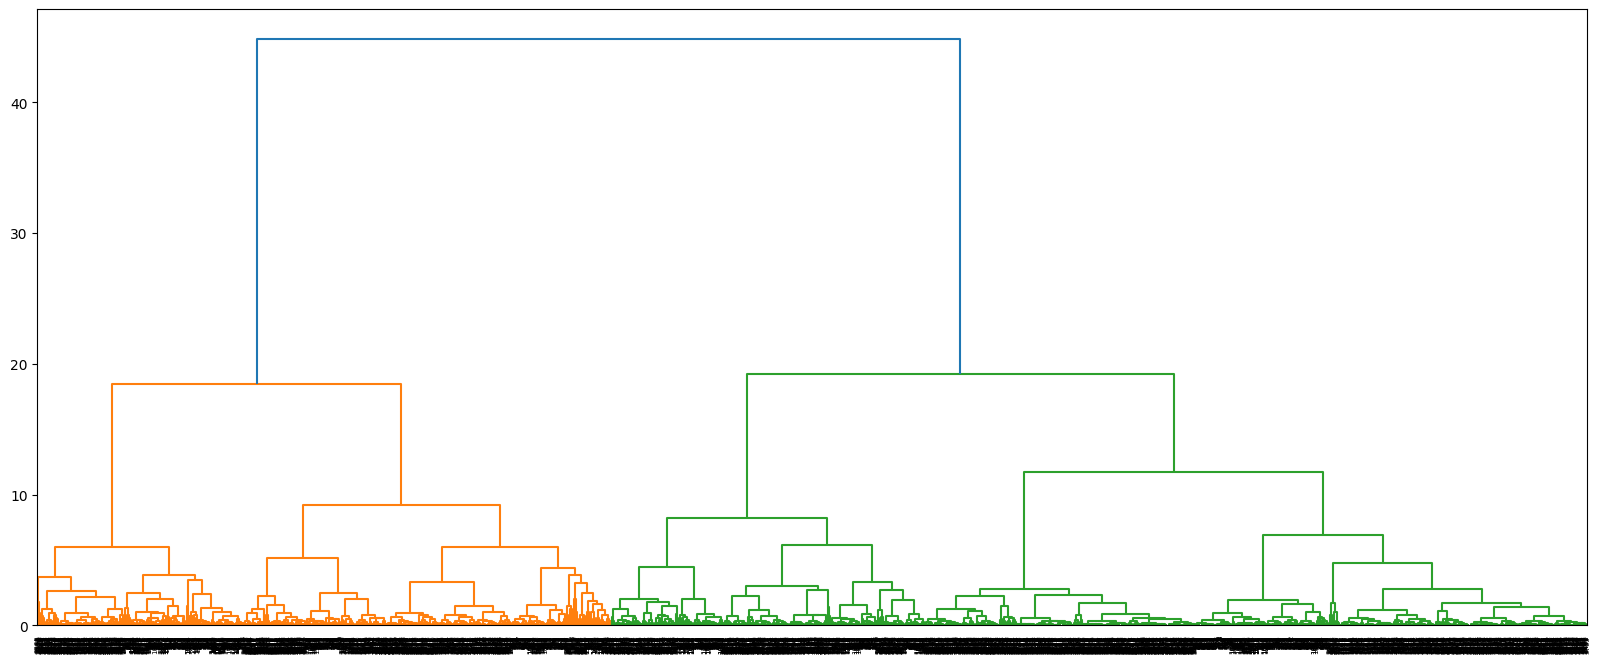

In [41]:
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [42]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [43]:
y_hc4 = hc.fit_predict(df_norm)

In [44]:
df['cluster'] = y_hc4

In [45]:
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1745.592843,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,1,2312.702339,37876.890058,52.797076,1.000000,1.019883,1.000585,2558.508187,5.730994,239.314035,0.697076,3562.376608,0.0
2,2,1877.870050,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0


## Viewing the values in all the 3 clusters, built using centroid linkage method

In [46]:
for i in range(3):
  print('cluster',i)
  print('The Users are:', ' , '.join(list(df[df['cluster']==i]["ID#"].astype(str).values))) # join function can only be used for Strings
  print('Total Users:', len(list(df[df['cluster']==i]["ID#"].values)))
  print()


cluster 0
The Users are: 5 , 8 , 9 , 10 , 12 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 29 , 30 , 36 , 37 , 39 , 40 , 42 , 43 , 44 , 46 , 48 , 49 , 53 , 54 , 58 , 60 , 66 , 69 , 71 , 81 , 82 , 83 , 88 , 89 , 92 , 93 , 95 , 96 , 97 , 102 , 103 , 104 , 106 , 108 , 109 , 110 , 111 , 112 , 114 , 116 , 117 , 120 , 121 , 122 , 124 , 125 , 126 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 140 , 141 , 148 , 150 , 153 , 154 , 157 , 160 , 161 , 164 , 165 , 166 , 167 , 170 , 171 , 172 , 173 , 175 , 176 , 178 , 179 , 180 , 181 , 182 , 184 , 187 , 190 , 194 , 195 , 196 , 198 , 200 , 202 , 203 , 204 , 205 , 207 , 210 , 211 , 212 , 214 , 217 , 222 , 224 , 225 , 226 , 230 , 231 , 234 , 235 , 237 , 238 , 239 , 241 , 242 , 245 , 248 , 249 , 251 , 252 , 257 , 258 , 261 , 263 , 268 , 269 , 272 , 273 , 274 , 275 , 276 , 279 , 281 , 283 , 285 , 287 , 288 , 289 , 290 , 292 , 294 , 295 , 296 , 300 , 302 , 304 , 306 , 309 , 311 , 315 , 316 , 317 , 318 , 319 , 322 , 323 , 325 , 326 , 327 , 329 ,

# Apply the K means clustring for cross check the results of hierarchical clustering

### Plotting elbow curve to determine the best number of clusters to be used in KMeans


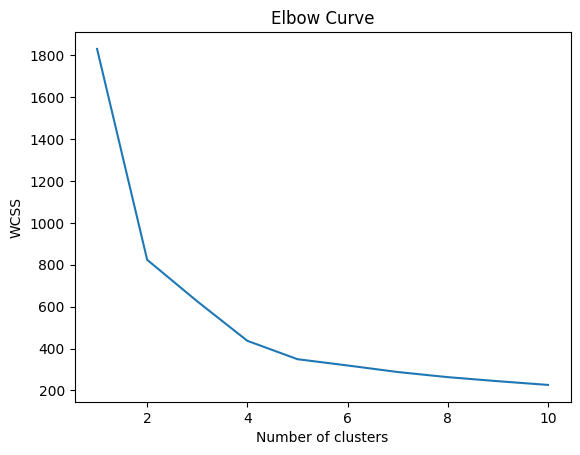

In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Creating a Kmeans cluster with 5 groups

---



In [54]:
from sklearn.cluster import KMeans
cluster_new = KMeans(5, random_state=42)
cluster_new.fit(df_norm)

KMeans(n_clusters=5, random_state=42)

In [55]:
KM_labels = cluster_new.labels_

In [56]:
df['cluster'] = cluster_new.labels_

In [57]:
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
1,1,1183.362903,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
2,2,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
3,3,1840.462783,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
4,4,3204.917636,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0


## Viewing the values in each of the Kmeans cluster

In [59]:
for i in range(5):
  print('cluster',i)
  print('The Users are:', ' , '.join(list(df[df['cluster']==i]["ID#"].astype(str).values))) # join function can only be used for Strings
  print('Total Users:', len(list(df[df['cluster']==i]["ID#"].values)))
  print()


cluster 0
The Users are: 5 , 9 , 10 , 12 , 16 , 17 , 19 , 20 , 21 , 29 , 36 , 39 , 42 , 44 , 49 , 53 , 60 , 66 , 69 , 71 , 81 , 82 , 88 , 95 , 97 , 102 , 103 , 108 , 111 , 112 , 121 , 124 , 125 , 126 , 128 , 129 , 130 , 132 , 137 , 140 , 150 , 153 , 154 , 157 , 160 , 161 , 164 , 166 , 167 , 170 , 171 , 172 , 173 , 175 , 178 , 184 , 190 , 194 , 195 , 196 , 200 , 203 , 204 , 207 , 210 , 212 , 214 , 217 , 222 , 224 , 225 , 231 , 234 , 235 , 242 , 248 , 249 , 252 , 257 , 263 , 269 , 272 , 273 , 274 , 275 , 276 , 281 , 283 , 285 , 288 , 289 , 290 , 292 , 294 , 295 , 296 , 300 , 302 , 306 , 309 , 315 , 316 , 317 , 318 , 325 , 326 , 331 , 332 , 334 , 339 , 340 , 345 , 350 , 367 , 374 , 377 , 382 , 385 , 389 , 393 , 397 , 410 , 411 , 416 , 418 , 419 , 422 , 429 , 430 , 431 , 433 , 443 , 444 , 447 , 450 , 452 , 456 , 459 , 462 , 464 , 467 , 471 , 472 , 473 , 478 , 481 , 484 , 485 , 491 , 492 , 498 , 505 , 511 , 516 , 518 , 523 , 532 , 533 , 534 , 535 , 537 , 538 , 540 , 541 , 543 , 552 , 553 , 

## Now we will apply the DBSCAN clustring for cross check the results of hierarchical clustering and Kmeans clustering

# Find best eps value using Elbow curve

In [138]:
df = df.drop('ID#', axis=1)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clust_db_scan
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1


In [139]:
array = df.values
array

array([[28143,     0,     1, ...,     0,     1,     0],
       [19244,     0,     1, ...,     0,     1,     0],
       [41354,     0,     1, ...,     0,     1,     0],
       ...,
       [73597,     0,     3, ...,     1,     0,     1],
       [54899,     0,     1, ...,     0,     4,     0],
       [ 3016,     0,     1, ...,     0,     4,     0]])

In [140]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -7.06042076e-01, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -7.06042076e-01, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -7.06042076e-01, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00, -1.37877552e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.31215825e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.31215825e+00, -7.66919299e-01]])

In [142]:
df.shape

(3999, 13)

In [146]:
from sklearn.neighbors import NearestNeighbors

neighs = NearestNeighbors(n_neighbors=20) #n_neighbors = 2D, D = independent var.
nbrs = neighs.fit(X)
distances, indices = nbrs.kneighbors(X)

In [147]:
# indices is a numpy array of shape (n_samples, n_neighbors)
# where n_samples is the number of samples in the dataset and
# n_neighbors is the number of neighbors to find for each sample.
# Each row in the array corresponds to a sample in the dataset and
# each element in the row corresponds to the index of a neighbor.

print(indices)


[[   0  378  363 ...  294  266  523]
 [   1    3  363 ...   62   98  294]
 [   2  338  368 ...    0  695   84]
 ...
 [3996 3877 3800 ... 3290 3612 3688]
 [3997 3623 3882 ... 3885 2908 2928]
 [3998 3491 3455 ... 3845 3378 3964]]


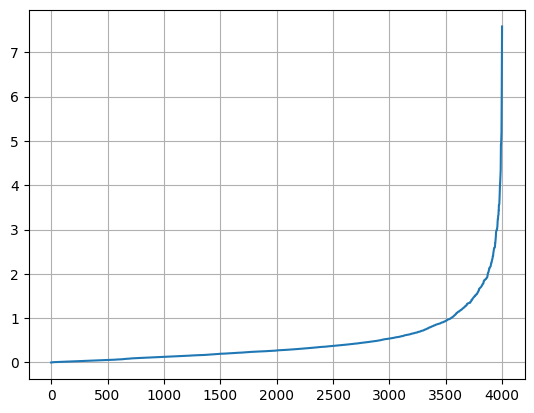

In [148]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid(True)
plt.show()

* The first column of the `distances` array is the distance to the nearest neighbor, which is always zero.
* By selecting `distances[:,1]`, the code is selecting the distances to the second nearest neighbors, which is more informative for determining the appropriate value of `eps` for DBSCAN.

In [160]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(df_norm)

DBSCAN(eps=0.8, min_samples=10)

In [161]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [162]:
cl = pd.DataFrame(dbscan.labels_, columns = ['cluster_lb'])
cl.head()

,cluster_lb
0,0
1,0
2,0
3,0
4,1


In [163]:
df['clust_db_scan'] = cl.cluster_lb

## Importing the metrics for calculating silhouette score

In [164]:
s1 = (metrics.silhouette_score(df_norm, y_hc1)).round(3) * 100
s1

53.5

In [165]:
s2 = (metrics.silhouette_score(df_norm, y_hc2)).round(3) * 100
s2

39.6

In [166]:
s3 = (metrics.silhouette_score(df_norm, y_hc3)).round(3) * 100
s3

41.699999999999996

In [167]:
s4 = (metrics.silhouette_score(df_norm, y_hc4)).round(3) * 100
s4

43.6

In [168]:
s5 = (metrics.silhouette_score(df_norm, cluster_new.labels_)).round(3) * 100
s5

44.3

In [169]:
s6 = (metrics.silhouette_score(df_norm, cl.cluster_lb)).round(3) * 100
s6

53.6

# Compare different models

In [170]:
t = {'Model':['Single','Average','Complete','Ward', 'Kmeans', 'DBScan'],
     'Silhouette score':[s1,s2,s3,s4,s5,s6]}
t = pd.DataFrame(t)
t

,Model,Silhouette score
0,Single,53.5
1,Average,39.6
2,Complete,41.7
3,Ward,43.6
4,Kmeans,44.3
5,DBScan,53.6


* From above 6 Models we can say DBScan model gives highest accuracy of 53.6 %